In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv")

In [3]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [4]:
df.to_csv("canada_per_capita_income.csv", index= False)

In [5]:
exercise = pd.read_csv("canada_per_capita_income.csv")

In [6]:
exercise

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [7]:
exercise.isna().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [8]:
exercise.duplicated().sum()

0

In [9]:
exercise.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


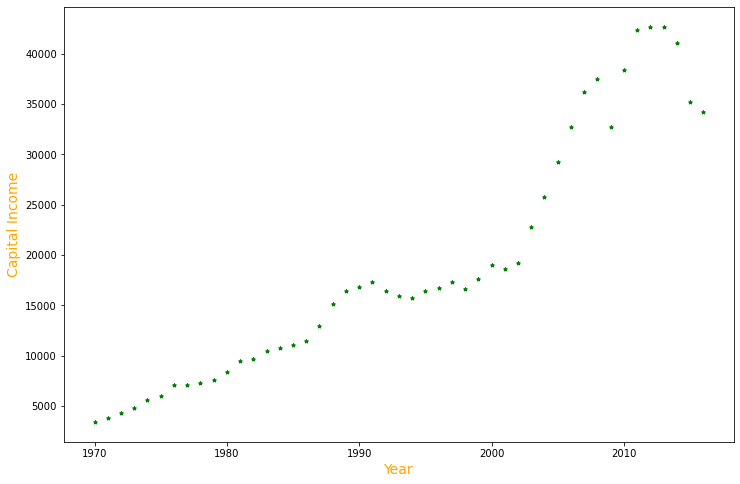

In [28]:
# plotting Scatter plot
plt.figure(figsize=(12,8))

plt.scatter(exercise['year'], exercise['per capita income (US$)'], marker=  "*", s = 14, color = "green")
plt.xlabel("Year", color ="Orange", size = 14)
plt.ylabel("Capital Income", color ="Orange", size = 14)

# plt.xlim([1970,2020])
plt.show()

<AxesSubplot:>

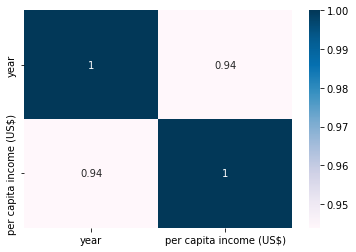

In [27]:
# chceking Correlation

sns.heatmap(exercise.corr(), annot=True, cmap= "PuBu")

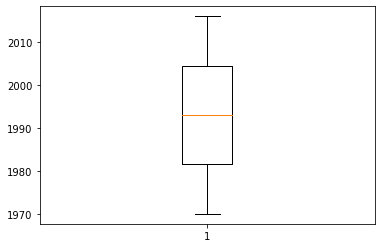

In [31]:
# checking outliers

plt.boxplot(exercise['year'])  # no outliers
plt.show()

## Modeling/predicting

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [49]:
X = exercise[['year']]
y = exercise['per capita income (US$)']

In [50]:
X.shape


(47, 1)

In [51]:
y.shape

(47,)

In [52]:
model.fit(X,y)

LinearRegression()

In [53]:
model

LinearRegression()

In [54]:
model.intercept_

-1632210.7578554575

In [55]:
model.coef_

array([828.46507522])

In [57]:
model.predict([[2020]])

array([41288.69409442])

In [78]:
# for 2020 and 2021 = net income

model.predict([[2020],[2021]])

array([41288.69409442, 42117.15916964])

In [79]:
model.predict([[2025]])

array([45431.01947053])

In [80]:
(model.coef_ * 2020 ) + model.intercept_

array([41288.69409442])

### best fit regression line

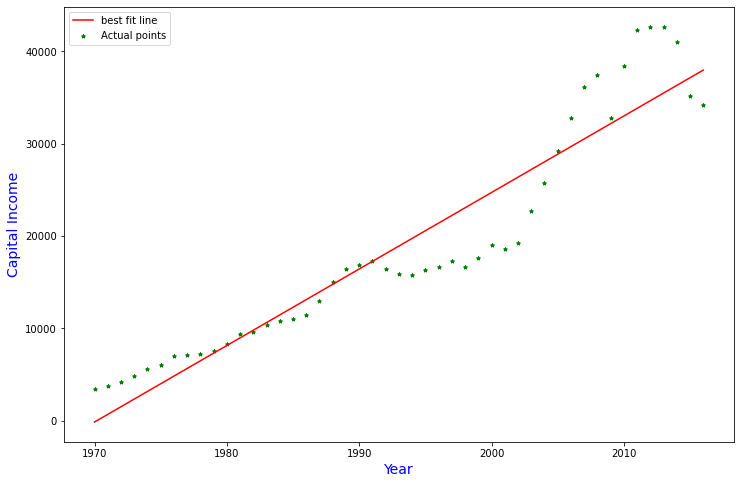

In [94]:
# plotting Scatter plot
plt.figure(figsize=(12,8))

plt.scatter(exercise['year'], exercise['per capita income (US$)'], marker=  "*", s = 14, color = "green" , label ="Actual points")
plt.xlabel("Year", color ="blue", size = 14)
plt.ylabel("Capital Income", color ="blue", size = 14)

# line
plt.plot(exercise['year'], model.predict(X), color = "red" , label = "best fit line" )

plt.legend()
plt.show()

In [111]:
model.predict([[5000]])

array([2510114.61825809])

In [113]:
plt.savefig("linear best fit line for canada net income.jpg")

<Figure size 432x288 with 0 Axes>

In [114]:
plt.savefig("reg line.png")

<Figure size 432x288 with 0 Axes>